# Plots to explain correlation between elspot price and exog variables

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import sys
sys.path.append('\\Users\\madss\\Aarhus Universitet\\CompTek\\6. Semester\\Bachelor\\github\\FEPCEU')
from data.data_retriever import Dataretreiver

In [77]:
def sigmoid(x, k=1, x_0=0):
    return 1 / (1 + np.exp(-k * (x - x_0)))

In [9]:
data = Dataretreiver()
data.wind_df.head()

c:\Users\madss\Aarhus Universitet\CompTek\6. Semester\Bachelor\github\FEPCEU\data\data_retriever.py:139: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.resample('H').ffill()
c:\Users\madss\Aarhus Universitet\CompTek\6. Semester\Bachelor\github\FEPCEU\data\data_retriever.py:140: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
c:\Users\madss\Aarhus Universitet\CompTek\6. Semester\Bachelor\github\FEPCEU\data\data_retriever.py:149: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  complete_date_range = pd.date_range(start=start_date, end=end_date, freq='H')
c:\Users\madss\Aarhus Universitet\CompTek\6. Semester\Bachelor\github\FEPCEU\data\data_retriever.py:182: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' inste

,wind_area_1,wind_area_10,wind_area_11,wind_area_12,wind_area_13,wind_area_14,wind_area_15,wind_area_16,wind_area_17,wind_area_18,...,wind_area_37,wind_area_38,wind_area_39,wind_area_4,wind_area_40,wind_area_5,wind_area_6,wind_area_7,wind_area_8,wind_area_9
time,,,,,,,,,,,,,,,,,,,,,
2024-01-01 00:00:00,2.73,7.12,1.33,1.75,1.35,4.91,9.51,0.37,1.64,0.38,...,0.54,7.22,12.42,4.0,13.04,3.61,2.42,4.73,2.62,4.81
2024-01-01 01:00:00,4.08,6.46,2.14,1.74,2.33,4.53,7.97,0.78,1.68,1.16,...,1.18,5.13,11.31,5.4,12.59,6.93,3.16,4.02,3.27,5.25
2024-01-01 02:00:00,5.43,5.79,2.95,1.74,3.31,4.15,6.44,1.19,1.71,1.95,...,1.82,3.04,10.20,6.8,12.15,10.26,3.91,3.31,3.91,5.69
2024-01-01 03:00:00,6.78,5.13,3.76,1.73,4.29,3.77,4.90,1.60,1.75,2.73,...,2.46,0.95,9.09,8.2,11.70,13.58,4.65,2.60,4.56,6.13
2024-01-01 04:00:00,5.10,7.00,3.87,1.47,4.10,5.15,5.53,2.49,1.59,3.21,...,2.05,1.04,8.44,8.7,10.86,16.48,4.20,2.04,4.77,7.21


In [120]:
cutoff_day = '2024-11-30'

wind_mean_df = data.wind_df.mean(axis=1, numeric_only=True)
sun_mean_df = data.sun_df.mean(axis=1, numeric_only=True)
temp_mean_df = data.temp_df.mean(axis=1, numeric_only=True)

el_df = data.elspot_df.copy()

el_df = el_df[el_df.index <= cutoff_day]



combined = pd.DataFrame({
    'wind': wind_mean_df, 
    'sun': sun_mean_df,
    'temperature': temp_mean_df,
    'price': el_df['price']
})

#combined['wind_sigmoid'] = sigmoid(combined['wind'], k=0.1, x_0=combined['wind'].mean())

combined = combined[combined.index <= cutoff_day]
combined

,wind,sun,temperature,price
2024-01-01 00:00:00,5.41025,0.0,5.1625,126.660004
2024-01-01 01:00:00,5.06225,0.0,5.1450,209.779999
2024-01-01 02:00:00,4.71450,0.0,5.0900,198.740005
2024-01-01 03:00:00,4.36650,0.0,5.0350,30.860001
2024-01-01 04:00:00,4.51550,0.0,4.9775,-0.220000
...,...,...,...,...
2024-11-29 20:00:00,9.96275,0.0,6.1075,894.219971
2024-11-29 21:00:00,10.11900,0.0,6.0025,836.049988
2024-11-29 22:00:00,10.40300,0.0,5.9150,848.200012
2024-11-29 23:00:00,10.68425,0.0,5.7975,770.270020


# Pearson correlation coeficient (PCC)

In [121]:
correlations = combined.corr(method='pearson')
print(correlations['price'])

wind          -0.415432
sun           -0.322854
temperature   -0.103851
price          1.000000
Name: price, dtype: float64


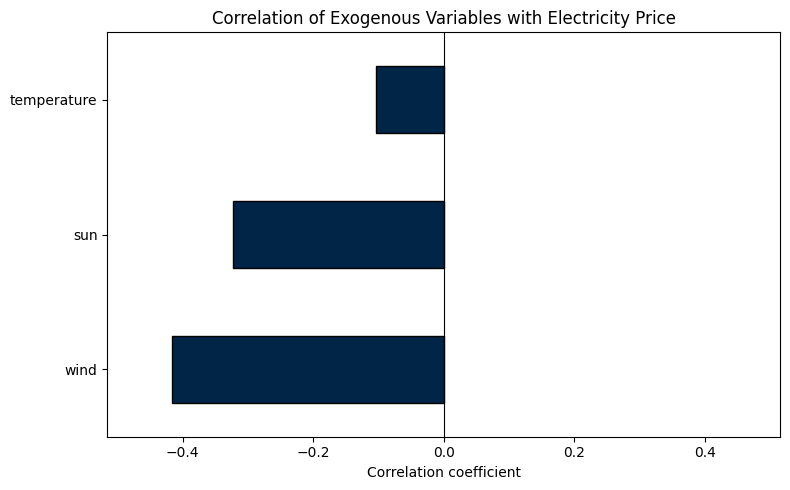

In [123]:
# Compute correlation matrix and extract correlations with price
corr_matrix = combined[['wind', 'sun', 'temperature', 'price']].corr()
correlations = corr_matrix['price'].drop('price')

# Determine symmetric x-axis limits
max_corr = max(abs(correlations.min()), abs(correlations.max()))
xlim = (-(max_corr +0.1), (max_corr+ 0.1))

# Plot horizontal bar chart
plt.figure(figsize=(8, 5))
correlations.sort_values().plot(kind='barh', color='#002546', edgecolor='black')
plt.title('Correlation of Exogenous Variables with Electricity Price')
plt.xlabel('Correlation coefficient')
plt.xlim(xlim)  # Center 0.00
plt.axvline(0, color='black', linewidth=0.8)  # Optional: vertical line at 0
plt.tight_layout()

# Save as SVG
plt.savefig('../plots/correlation_with_price.pdf', format='pdf')
plt.show()


# Granger causality test

# Correlation plots

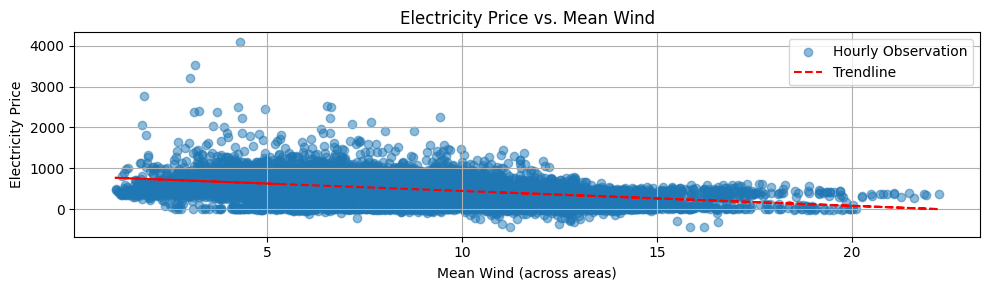

In [115]:
import matplotlib.pyplot as plt

# Fit a linear trendline
z = np.polyfit(combined['wind'], combined['price'], 1)
p = np.poly1d(z)

plt.figure(figsize=(10,3))
plt.scatter(combined['wind'], combined['price'], alpha=0.5, label='Hourly Observation')
plt.plot(combined['wind'], p(combined['wind']), 'r--', label='Trendline')
plt.title('Electricity Price vs. Mean Wind')
plt.xlabel('Mean Wind (across areas)')
plt.ylabel('Electricity Price')
plt.grid(True)
plt.tight_layout()

plt.savefig('../plots/elspot_vs_mean_wind.pdf', format='pdf')
plt.legend()
plt.show()

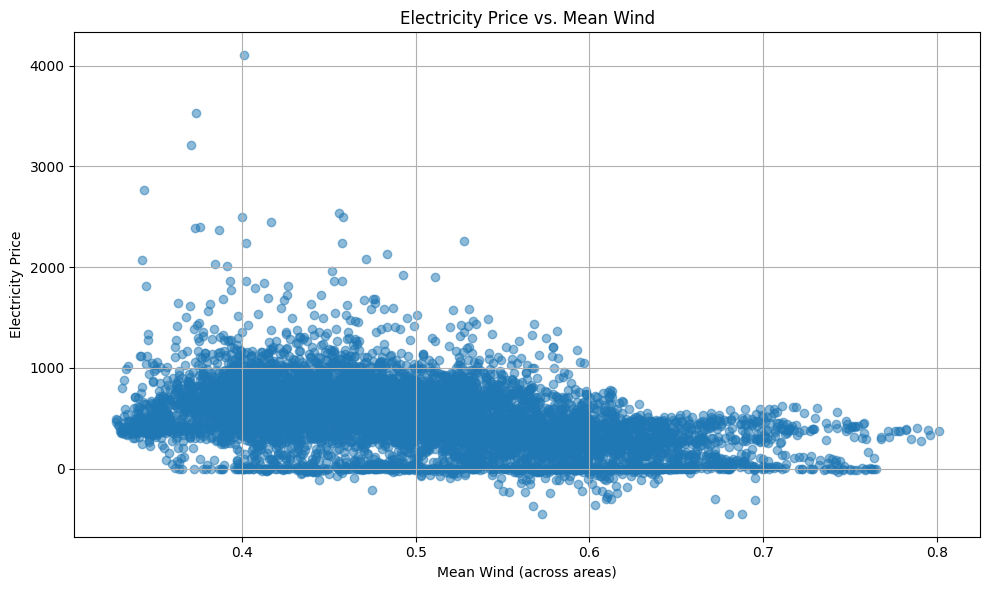

In [82]:
plt.figure(figsize=(10,6))
plt.scatter(combined['wind_sigmoid'], combined['price'], alpha=0.5)
plt.title('Electricity Price vs. Mean Wind')
plt.xlabel('Mean Wind (across areas)')
plt.ylabel('Electricity Price')
plt.grid(True)
plt.tight_layout()
plt.show()